<a href="https://colab.research.google.com/github/asaputra1995/ump-indonesia-2022-2023/blob/main/UMP_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gspread
import pandas as pd
from google.oauth2.credentials import Credentials
from google.auth.transport.requests import Request

In [2]:
df = pd.read_table('/content/drive/MyDrive/Personal Project/UMP Indonesia/cred.txt')

In [3]:
access_token = df[df['variable']=='access_token'].iloc[0,1]
refresh_token = df[df['variable']=='refresh_token'].iloc[0,1]
client_id = df[df['variable']=='client_id'].iloc[0,1]
client_secret = df[df['variable']=='client_secret'].iloc[0,1]

In [4]:
import geopandas as gpd

In [5]:
gdf = gpd.read_file('/content/drive/MyDrive/Personal Project/UMP Indonesia/indonesia.geojson')

<Axes: >

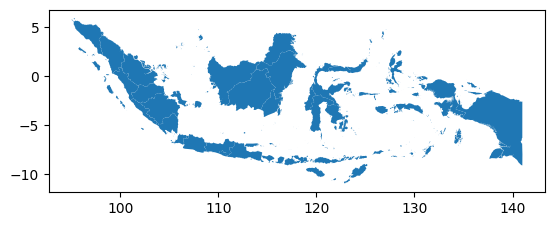

In [6]:
gdf.plot()

In [7]:
gdf.head()

,cartodb_id,country,id_1,slug,state,geometry
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.62750, 98.00173 4.6..."
1,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.50250, 99.20500 -1..."
2,8,Indonesia,34,indonesia-yogyakarta,Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ..."
3,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6..."
4,7,Indonesia,3,indonesia-bangkabelitung,Bangka-Belitung,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ..."


In [10]:
spreadsheet_id = '107uRMlbKfmnOMC-6iIuZIEzRlppWf_i-hqi1uzAvlP8'
sheet_name = 'Sheet1'  # Replace with your sheet name

# Create credentials object using the access token and refresh token
creds = Credentials(
    token=access_token,
    refresh_token=refresh_token,
    client_id=client_id,
    client_secret=client_secret,
    token_uri='https://oauth2.googleapis.com/token'
)

# Refresh token if needed
if not creds.valid:
    if creds.expired and creds.refresh_token:
        creds.refresh(Request())

# Authorize the client with gspread
client = gspread.authorize(creds)

# Open the Google Sheet by its ID
spreadsheet = client.open_by_key(spreadsheet_id)

# Open the specific sheet by its name
sheet = spreadsheet.worksheet(sheet_name)

# Get the range A1:C30 from the sheet
cell_range = sheet.get('A1:D')

# Convert the data to a DataFrame
# If the range contains headers, you can use the first row as column headers
df = pd.DataFrame(cell_range[1:], columns=cell_range[0])

# Print the DataFrame
df.head()


,Provinsi,UMP 2022,UMP 2023,kenaikan
